# Overview of rmb
`rmb` (rapid model builder) is a Python package designed to streamline the creation and manipulation of groundwater model input files. It does this by leveraging a user-defined YAML input file and a set of backend templates.


## Core Functionality
**Model Template Selection**: The input file specifies a model_type, which rmb uses to pull the appropriate backend templates.

**Graph-Based Execution**: Using the input and backend dependencies, rmb constructs a directed graph where nodes represent processing modules (e.g. creating arrays, applying spatial data) and edges represent dependencies between them.

**Model Building**: Traversing this graph, rmb generates the required model input files for engines like MODFLOW or SWAT.

**Simulation Object (sim)**: Allows investigation of intermediate or gridded data. Supports plotting and diagnostics.

**Enables modular edits**: if a node is changed (e.g. a boundary condition or array), only downstream dependent nodes are recomputed.

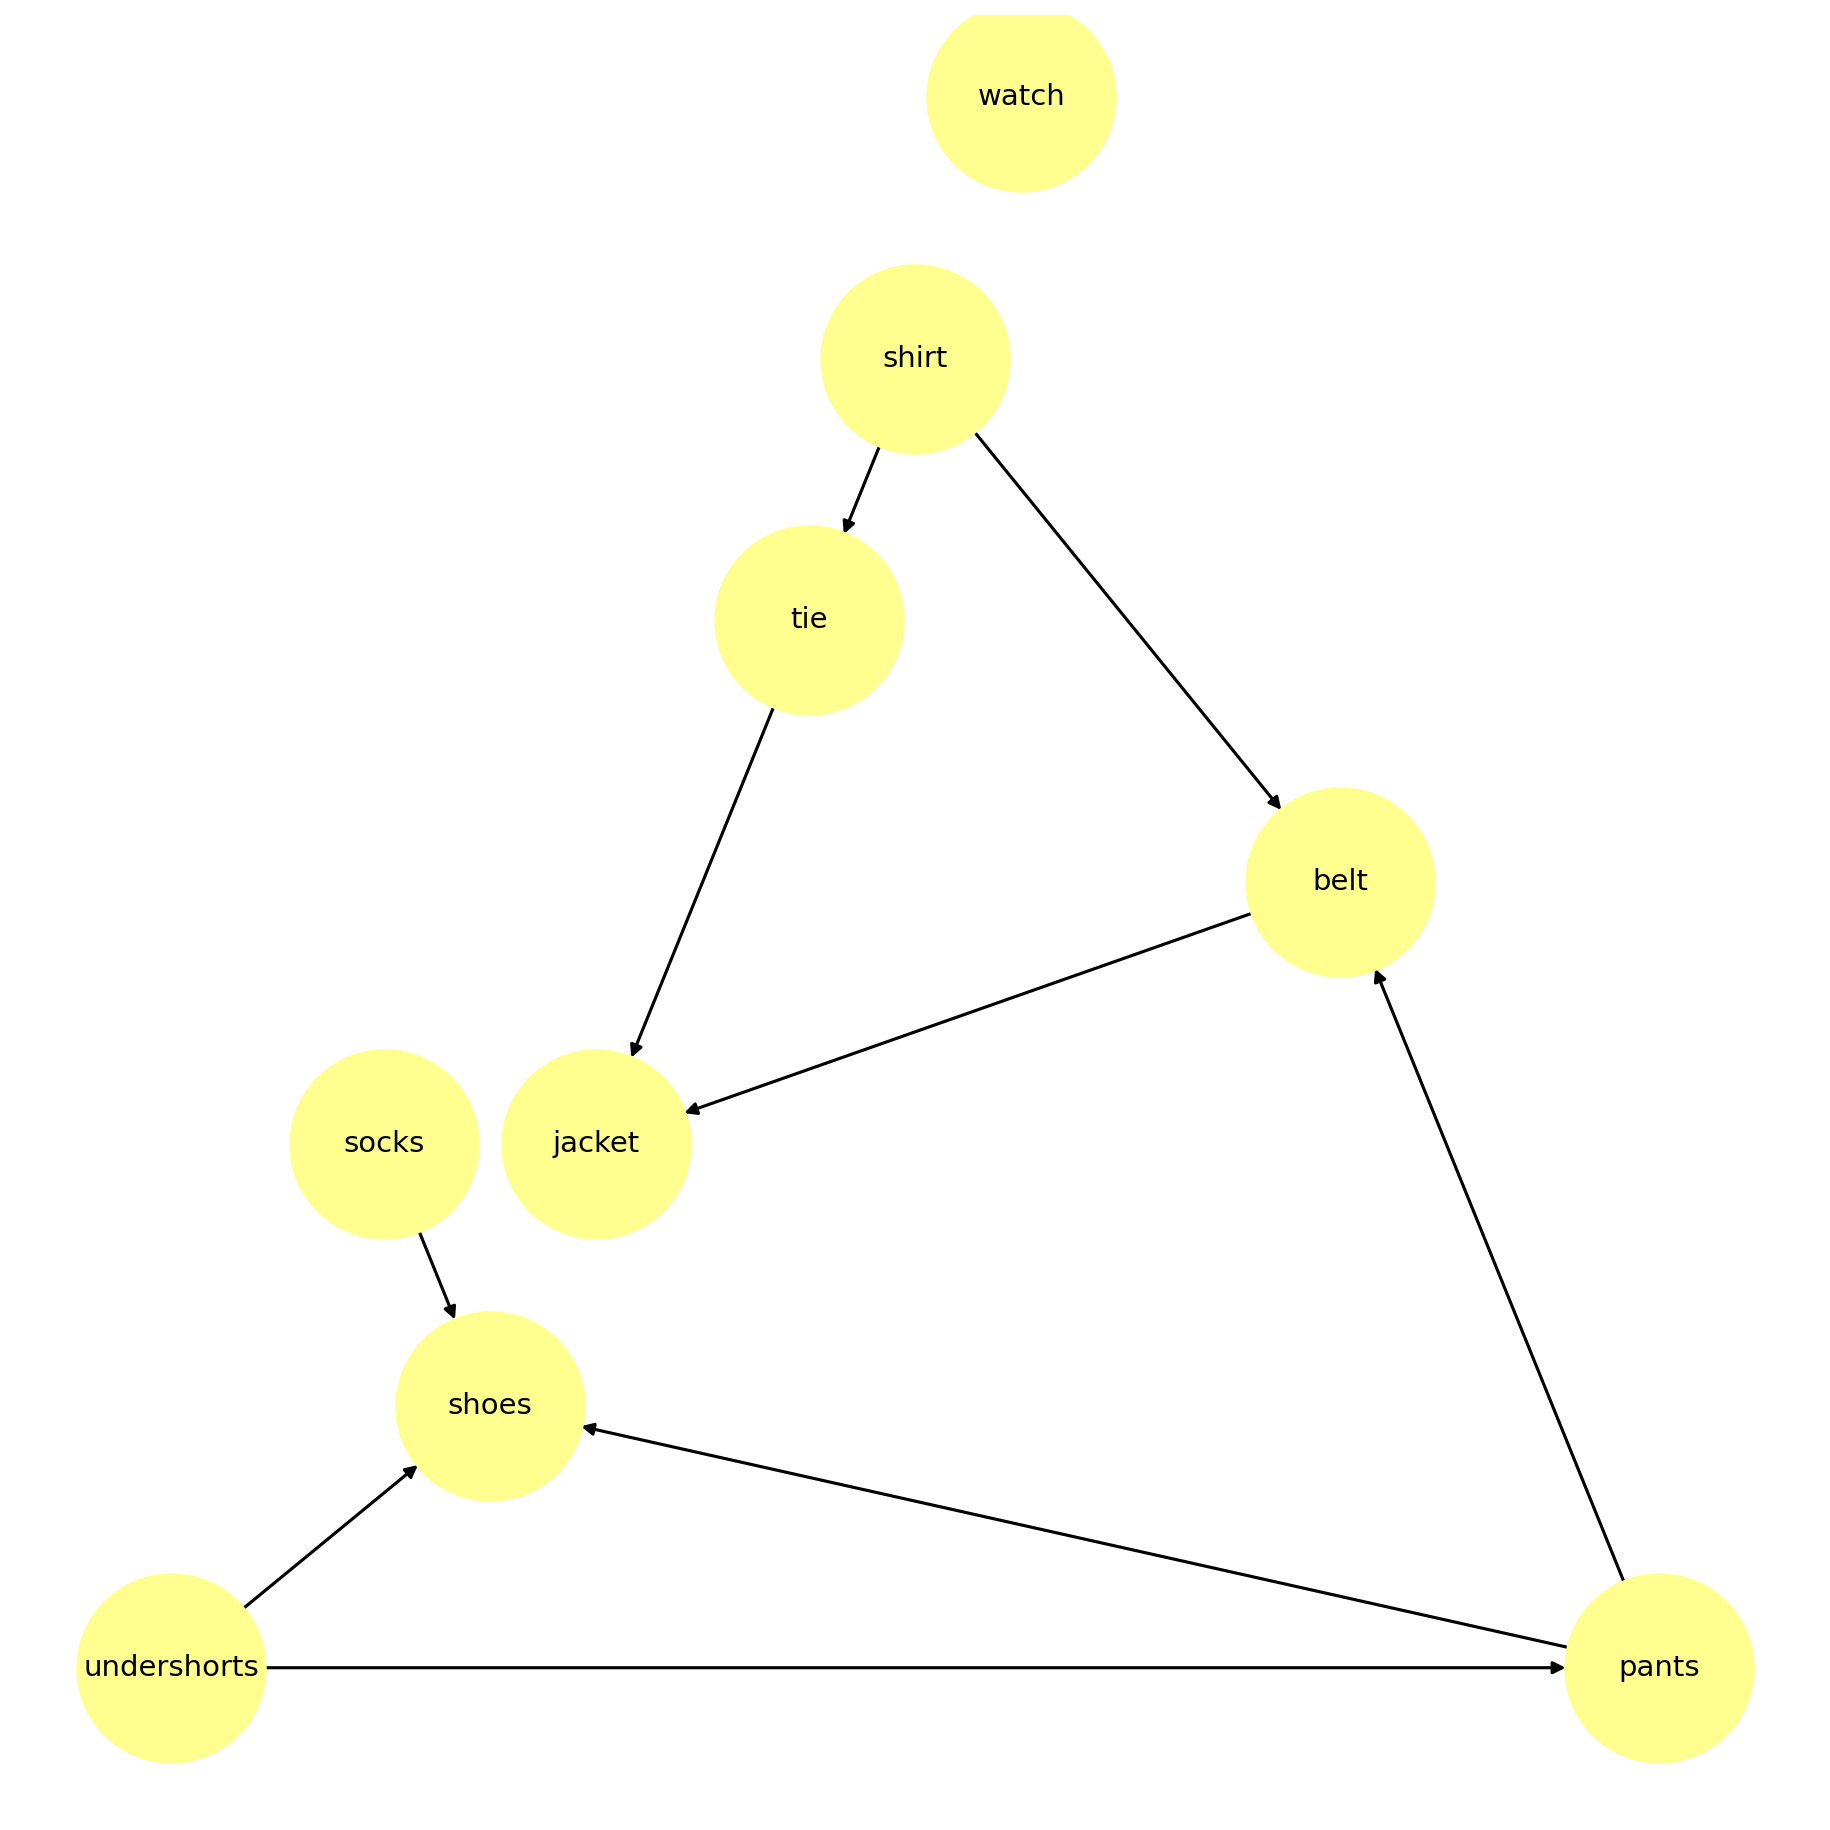

# Nodes

## Types of nodes/Edges

- **Input nodes**:
  - **User input**: from the user config file (ie. yamls)
  - **Model input**: Specific to the template model files (ie. mf6, swat). related to module nodes. This is also the 'output' of rmb, but the input to the model.
- **Module nodes**: Derived based on core inputs in user input file and backend model type template files (ie. generic, mf6, swat). 
- **Mesh nodes**: Derived based on core inputs in user input file. Represents spatial discretization.
- **Temporal nodes**: Derived based on core inputs in user input file. Represents temporal discretization.
- **Data nodes**: Represents intermediate needs, but useful for user to investigate or plot model parts. Generated based on Mesh, Temporal, User, Model, Module nodes. Data nodes will be specific to model inputs. But not necessarily in the output format.
- **Pipeline nodes**: Represents operational processes. Will have input and output nodes. Maybe this is a type of edge?

## Node Naming Convention

| Node Type     | Description           | Suggested Naming Prefix   | Example ID                            |
| -----         | --------              | ---------                 | --------------                        |
| `input.user`    | From frontend YAML; scope is the dict path    | `input.user.<scope>`        | `input.user.discretization.grid_size`   |
| `input.model` | Specific to backend model template; cmd kwargs in module inputs | `input.model.<module>` | `input.model.drn.stress_period_data` |
| `module` | Logical building block from templates |` module.<model_type>.<kind>.<usrname> `| `module.mf6.sfr.mysfr` |
| `mesh` | Spatial discretization | `mesh.<dimension/element>` | `mesh.grid` |
| `temporal` | Time discretization info | `temporal.<aspect> `| `temporal.time_steps` |
| `data` | Intermediate/derived info | `data.<module>.<parameter>` | `data.sfr.rmb_botm` |
| `pipeline` | Operation/process node | `pipeline.<name>` | `pipeline.interpolate_rainfall` |